In [155]:
# 6.00 Problem Set 8
#
# Name: Dar'ya Redka
# Collaborators:
# Time:



import pandas as pd
import numpy as np
import random
import pylab
from problem_set_7 import *

In [20]:
# PROBLEM 1

In [109]:
class ResistantVirus(SimpleVirus):

    """
    Representation of a virus which can have drug resistance.
    """      

    def __init__(self, maxBirthProb, clearProb, resistances, mutProb):

#         """

#         Initialize a ResistantVirus instance, saves all parameters as attributes
#         of the instance.

#         maxBirthProb: Maximum reproduction probability (a float between 0-1)        
#         clearProb: Maximum clearance probability (a float between 0-1).

#         resistances: A dictionary of drug names (strings) mapping to the state
#         of this virus particle's resistance (either True or False) to each drug.
#         e.g. {'guttagonol':False, 'grimpex',False}, means that this virus
#         particle is resistant to neither guttagonol nor grimpex.

#         mutProb: Mutation probability for this virus particle (a float). This is
#         the probability of the offspring acquiring or losing resistance to a drug.        

#         """


        # TODO: DONE
        
        SimpleVirus.__init__(self, maxBirthProb, clearProb)
        self.resistances = resistances
        self.mutProb = mutProb
        
    def isResistantTo(self, drug):

#         """
#         Get the state of this virus particle's resistance to a drug. This method
#         is called by getResistPop() in Patient to determine how many virus
#         particles have resistance to a drug.    

#         drug: The drug (a string)
#         returns: True if this virus instance is resistant to the drug, False
#         otherwise.
#         """

        # TODO: DONE
        
        return self.resistances[drug]

    def reproduce(self, popDensity, activeDrugs):

#         """
#         Stochastically determines whether this virus particle reproduces at a
#         time step. Called by the update() method in the Patient class.

#         If the virus particle is not resistant to any drug in activeDrugs,
#         then it does not reproduce. Otherwise, the virus particle reproduces
#         with probability:       
        
#         self.maxBirthProb * (1 - popDensity).                       
        
#         If this virus particle reproduces, then reproduce() creates and returns
#         the instance of the offspring ResistantVirus (which has the same
#         maxBirthProb and clearProb values as its parent). 

#         For each drug resistance trait of the virus (i.e. each key of
#         self.resistances), the offspring has probability 1-mutProb of
#         inheriting that resistance trait from the parent, and probability
#         mutProb of switching that resistance trait in the offspring.        

#         For example, if a virus particle is resistant to guttagonol but not
#         grimpex, and `self.mutProb` is 0.1, then there is a 10% chance that
#         that the offspring will lose resistance to guttagonol and a 90% 
#         chance that the offspring will be resistant to guttagonol.
#         There is also a 10% chance that the offspring will gain resistance to
#         grimpex and a 90% chance that the offspring will not be resistant to
#         grimpex.

#         popDensity: the population density (a float), defined as the current
#         virus population divided by the maximum population        

#         activeDrugs: a list of the drug names acting on this virus particle
#         (a list of strings). 
        
#         returns: a new instance of the ResistantVirus class representing the
#         offspring of this virus particle. The child should have the same
#         maxBirthProb and clearProb values as this virus. Raises a
#         NoChildException if this virus particle does not reproduce.         
#         """
        # TODO: DONE 
        
        for drug in activeDrugs:
            if self.resistances[drug] == False: 
                raise NoChildException
        if random.random() <= self.maxBirthProb * (1 - popDensity):
            new_resistances = mut_resistances(self.resistances, self.mutProb)
            return ResistantVirus(self.maxBirthProb, self.clearProb, new_resistances, self.mutProb)
        else:
            raise NoChildException
            

In [66]:
def mut_resistances(resistances, mutProb):
    new_resistances = {}
    for drug in resistances:
        if random.random() <= (1 - mutProb):
            new_resistances[drug] = resistances[drug]
        else: 
            new_resistances[drug] = not resistances[drug]
    return new_resistances

In [67]:
#test: 
# resistances = {'drugA': False}
# mut_resistances(resistances, 0.9)

{'drugA': True}

In [72]:
# test
# resistances = {'drugA': True}
# virus = ResistantVirus(0.5, 0.5, resistances, 0.9)
# virus.reproduce(0.1, ['drugA'])

In [153]:
class Patient(SimplePatient):

#     """
#     Representation of a patient. The patient is able to take drugs and his/her
#     virus population can acquire resistance to the drugs he/she takes.
#     """

    def __init__(self, viruses, maxPop):
#         """
#         Initialization function, saves the viruses and maxPop parameters as
#         attributes. Also initializes the list of drugs being administered
#         (which should initially include no drugs).               

#         viruses: the list representing the virus population (a list of
#         SimpleVirus instances)
        
#         maxPop: the  maximum virus population for this patient (an integer)
#         """
        # TODO: DONE
        
        SimplePatient.__init__(self, viruses, maxPop)
        self.drugs = []

    def addPrescription(self, newDrug):

#         """
#         Administer a drug to this patient. After a prescription is added, the 
#         drug acts on the virus population for all subsequent time steps. If the
#         newDrug is already prescribed to this patient, the method has no effect.

#         newDrug: The name of the drug to administer to the patient (a string).

#         postcondition: list of drugs being administered to a patient is updated
#         """
        # TODO: DONE
        # should not allow one drug being added to the list multiple times
        
        if newDrug in self.drugs:
            pass
        else: 
            self.drugs.append(newDrug)

    def getPrescriptions(self):

#         """
#         Returns the drugs that are being administered to this patient.
#         returns: The list of drug names (strings) being administered to this
#         patient.
#         """
        
        # TODO: DONE
        
        return self.drugs

    def getResistPop(self, drugResist):
#         """
#         Get the population of virus particles resistant to the drugs listed in 
#         drugResist.        

#         drugResist: Which drug resistances to include in the population (a list
#         of strings - e.g. ['guttagonol'] or ['guttagonol', 'grimpex'])

#         returns: the population of viruses (an integer) with resistances to all
#         drugs in the drugResist list.
#         """
        # TODO: DONE
                   
        count = 0
        for virus in self.viruses:
            if all(virus.isResistantTo(drug) for drug in drugResist):
                count += 1
            else: 
                continue
        return count

    def update(self):

#         """
#         Update the state of the virus population in this patient for a single
#         time step. update() should execute these actions in order:
        
#         - Determine whether each virus particle survives and update the list of 
#           virus particles accordingly          
#         - The current population density is calculated. This population density
#           value is used until the next call to update().
#         - Determine whether each virus particle should reproduce and add
#           offspring virus particles to the list of viruses in this patient. 
#           The listof drugs being administered should be accounted for in the
#           determination of whether each virus particle reproduces. 

#         returns: the total virus population at the end of the update (an
#         integer)
#         """
        # TODO: DONE
        
        drugs = self.getPrescriptions()
        survivors = []
        after_rep = []
        
        for virus in self.viruses:
            if not virus.doesClear():
                survivors.append(virus)
        popDensity = len(survivors)/self.maxPop
        for virus in survivors:
            after_rep.append(virus)
            try:
                after_rep.append(virus.reproduce(popDensity, drugs))
            except NoChildException:
                pass
        self.viruses = after_rep
        return self.getTotalPop()

In [87]:
# testlist = [2,4,6]
# if all(item%2 == 0 for item in testlist):
#     print('yes')

yes


In [ ]:
# PROBLEM 2
# #

In [117]:
def createResistantViruses(n, maxBirthProb, clearProb, resistances, mutProb):
    viruses = []
    for i in range (1, n+1):
        virus = ResistantVirus(maxBirthProb, clearProb, resistances, mutProb) 
        viruses.append(virus)
    return viruses

In [116]:
test_viruses = createResistantViruses(50, 0.5, 0.5, {'guttagonol': False}, 0.005)
patient = Patient(test_viruses, 500)
patient.update()

40

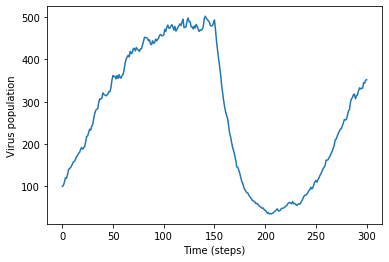

In [142]:
def simulationWithDrug(delay):

#     """
#     Runs simulations and plots graphs for problem 4.
#     Instantiates a patient, runs a simulation for 150 timesteps, adds
#     guttagonol, and runs the simulation for an additional 150 timesteps.
#     total virus population vs. time and guttagonol-resistant virus population
#     vs. time are plotted
#     """
    # TODO: DONE
    
    resistances = {'guttagonol': False}
    viruses = createResistantViruses(100, 0.1, 0.05, resistances, 0.005)
    patient = Patient(viruses, 1000)
    populations = []
    populations.append(len(viruses))
    steps = [0]
    for t in range (1, delay + 1):
        populations.append(patient.update())
        steps.append(t)
    patient.addPrescription('guttagonol')
    for t in range (delay + 1,delay + 151):
        populations.append(patient.update())
        steps.append(t)  
    
    pylab.plot(steps, populations)
    pylab.xlabel('Time (steps)')
    pylab.ylabel('Virus population')
    
simulationWithDrug(150)
pylab.show()

In [188]:
# PROBLEM 3      

def simulationDelayedTreatment(delay):

#     """
#     Runs simulations and make histograms for problem 5.
#     Runs multiple simulations to show the relationship between delayed treatment
#     and patient outcome.
#     Histograms of final total virus populations are displayed for delays of 300,
#     150, 75, 0 timesteps (followed by an additional 150 timesteps of
#     simulation).    
#     """

    # TODO: DONE
    
    final_pops = []
    for i in range (1, 501):
        resistances = {'guttagonol': False}
        viruses = createResistantViruses(100, 0.1, 0.05, resistances, 0.005)
        patient = Patient(viruses, 1000)
        for t in range (1, delay + 1):
            patient.update()
        patient.addPrescription('guttagonol')
        for t in range (delay + 1,delay + 151):
            patient.update()
        final_pops.append(patient.getTotalPop())
    pylab.figure('Delay_%d_time_steps' % delay)
    pylab.hist(final_pops)
    pylab.xlabel('Final Virus Population')
    pylab.ylabel('Number of patients')
    pylab.title('Delay of %d' % delay)
    pylab.savefig('Delay_%d.png' % delay)

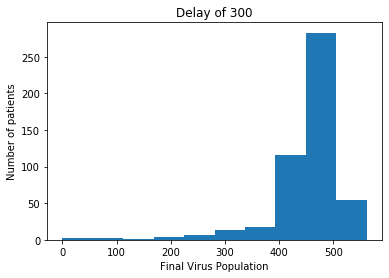

In [189]:
simulationDelayedTreatment(300)
pylab.show()

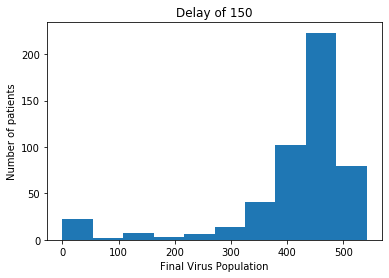

In [190]:
simulationDelayedTreatment(150)
pylab.show()

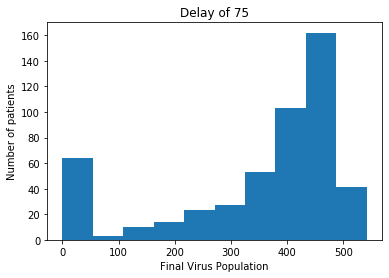

In [191]:
simulationDelayedTreatment(75)
pylab.show()

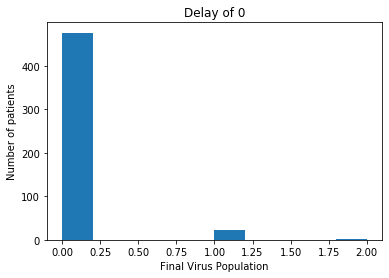

In [192]:
simulationDelayedTreatment(0)
pylab.show()

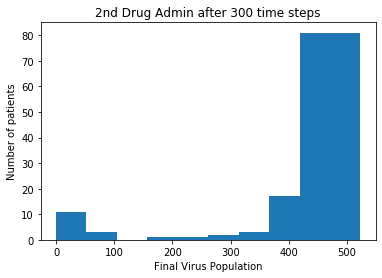

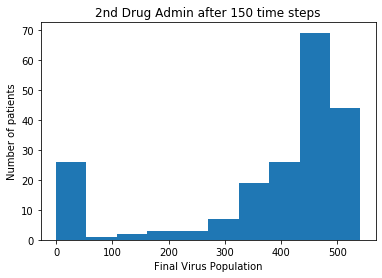

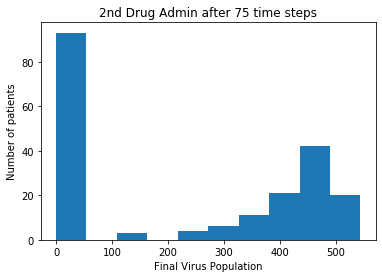

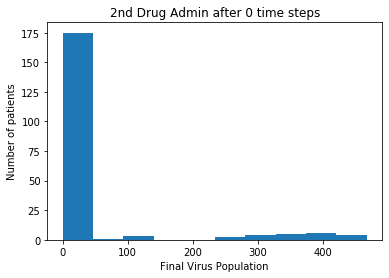

In [193]:
# PROBLEM 4
#
def simulationTwoDrugsDelayedTreatment():

#     """
#     Runs simulations and make histograms for problem 6.
#     Runs multiple simulations to show the relationship between administration
#     of multiple drugs and patient outcome.
   
#     Histograms of final total virus populations are displayed for lag times of
#     150, 75, 0 timesteps between adding drugs (followed by an additional 150
#     timesteps of simulation).
#     """

    # TODO: DONE
    
    for sec_drug_admin in [300, 150, 75, 0]:
        final_pops = []
        for patient in range (200):
            resistances = {'guttagonol': False, 'grimpex': False}
            viruses = createResistantViruses(100, 0.1, 0.05, resistances, 0.005)
            patient = Patient(viruses, 1000)
            for t in range (150):
                patient.update()
            patient.addPrescription('guttagonol')
            for t in range (sec_drug_admin):
                patient.update()
            patient.addPrescription('grimpex')
            for t in range (150):
                patient.update()    
            final_pops.append(patient.getTotalPop())
        pylab.figure('Sec_drug_admin__at_%d_time_steps' % sec_drug_admin)
        pylab.hist(final_pops)
        pylab.xlabel('Final Virus Population')
        pylab.ylabel('Number of patients')
        pylab.title('2nd Drug Admin after %d time steps' % sec_drug_admin)
        pylab.savefig('2nd_Drug_Admin_%d.png' % sec_drug_admin)
simulationTwoDrugsDelayedTreatment()

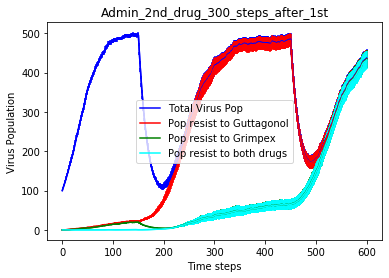

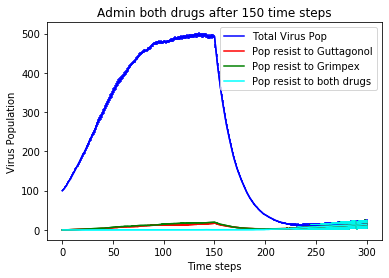

In [187]:
# PROBLEM 5

def simulationTwoDrugsVirusPopulations():

#     """

#     Run simulations and plot graphs examining the relationship between
#     administration of multiple drugs and patient outcome.
#     Plots of total and drug-resistant viruses vs. time are made for a
#     simulation with a 300 time step delay between administering the 2 drugs and
#     a simulations for which drugs are administered simultaneously.        

#     """
    #TODO: DONE 
    
    total_repeats = []
    gutta_resist_repeats = []
    grimp_resist_repeats = []
    both_resist_repeats = []
    for patient in range (30):
        resistances = {'guttagonol': False, 'grimpex': False}
        viruses = createResistantViruses(100, 0.1, 0.05, resistances, 0.005)
        patient = Patient(viruses, 1000)
        tot_pop = [patient.getTotalPop()]
        gutta_res_pop = [patient.getResistPop(['guttagonol'])]
        grimp_res_pop = [patient.getResistPop(['grimpex'])]
        both_res_pop = [patient.getResistPop(['guttagonol', 'grimpex'])]
        steps = [0]
        for t in range (1, 151):
            patient.update()
            tot_pop.append(patient.getTotalPop())
            gutta_res_pop.append(patient.getResistPop(['guttagonol']))
            grimp_res_pop.append(patient.getResistPop(['grimpex']))
            both_res_pop.append(patient.getResistPop(['guttagonol', 'grimpex']))
            steps.append(t)
            
        patient.addPrescription('guttagonol')
        
        for t in range (151, 151 + 300):
            patient.update()
            tot_pop.append(patient.getTotalPop())
            gutta_res_pop.append(patient.getResistPop(['guttagonol']))
            grimp_res_pop.append(patient.getResistPop(['grimpex']))
            both_res_pop.append(patient.getResistPop(['guttagonol', 'grimpex']))
            steps.append(t)
        
        patient.addPrescription('grimpex')
        
        for t in range (151+300, 151+300+150):
            patient.update()
            tot_pop.append(patient.getTotalPop())
            gutta_res_pop.append(patient.getResistPop(['guttagonol']))
            grimp_res_pop.append(patient.getResistPop(['grimpex']))
            both_res_pop.append(patient.getResistPop(['guttagonol', 'grimpex']))
            steps.append(t)   
        
        total_repeats.append(tot_pop)
        gutta_resist_repeats.append(gutta_res_pop)
        grimp_resist_repeats.append(grimp_res_pop)
        both_resist_repeats.append(both_res_pop)
                
    totals_pop_df = pd.DataFrame(total_repeats)    
    gutta_df = pd.DataFrame(gutta_resist_repeats)
    grimp_df = pd.DataFrame(grimp_resist_repeats)
    both_df = pd.DataFrame(both_resist_repeats)
        
    pylab.figure('Admin_2nd_drug_300_steps_after_1st')
    pylab.plot(steps, totals_pop_df.mean(), label = 'Total Virus Pop', color = 'blue')
    pylab.errorbar(steps, totals_pop_df.mean(), yerr=totals_pop_df.std()/np.sqrt(len(totals_pop_df)), color = 'blue')
    pylab.plot(steps, gutta_df.mean(), label = 'Pop resist to Guttagonol', color = 'red')
    pylab.errorbar(steps, gutta_df.mean(), yerr=gutta_df.std()/np.sqrt(len(gutta_df)), color = 'red')
    pylab.plot(steps, grimp_df.mean(), label = 'Pop resist to Grimpex', color = 'green')
    pylab.errorbar(steps, grimp_df.mean(), yerr=grimp_df.std()/np.sqrt(len(grimp_df)), color = 'green')
    pylab.plot(steps, both_df.mean(), label = 'Pop resist to both drugs', color = 'cyan')
    pylab.errorbar(steps, both_df.mean(), yerr=both_df.std()/np.sqrt(len(both_df)), color = 'cyan')
    pylab.xlabel('Time steps')
    pylab.ylabel('Virus Population')
    pylab.title('Admin_2nd_drug_300_steps_after_1st')
    pylab.legend()
    pylab.savefig('Admin_2nd_drug_300_steps_after_1st.png')
    
    # *** Admin two drugs simultaneously   ****
        
    total_repeats = []
    gutta_resist_repeats = []
    grimp_resist_repeats = []
    both_resist_repeats = []
    
    for patient in range (30):
        resistances = {'guttagonol': False, 'grimpex': False}
        viruses = createResistantViruses(100, 0.1, 0.05, resistances, 0.005)
        patient = Patient(viruses, 1000)
        tot_pop = [patient.getTotalPop()]
        gutta_res_pop = [patient.getResistPop(['guttagonol'])]
        grimp_res_pop = [patient.getResistPop(['grimpex'])]
        both_res_pop = [patient.getResistPop(['guttagonol', 'grimpex'])]
        steps = [0]
        
        for t in range (1, 151):
            patient.update()
            tot_pop.append(patient.getTotalPop())
            gutta_res_pop.append(patient.getResistPop(['guttagonol']))
            grimp_res_pop.append(patient.getResistPop(['grimpex']))
            both_res_pop.append(patient.getResistPop(['guttagonol', 'grimpex']))
            steps.append(t)
            
        patient.addPrescription('guttagonol')
        patient.addPrescription('grimpex')
        
        for t in range (151, 301):
            patient.update()
            tot_pop.append(patient.getTotalPop())
            gutta_res_pop.append(patient.getResistPop(['guttagonol']))
            grimp_res_pop.append(patient.getResistPop(['grimpex']))
            both_res_pop.append(patient.getResistPop(['guttagonol', 'grimpex']))
            steps.append(t)
                  
        total_repeats.append(tot_pop)
        gutta_resist_repeats.append(gutta_res_pop)
        grimp_resist_repeats.append(grimp_res_pop)
        both_resist_repeats.append(both_res_pop)
                
    totals_pop_df = pd.DataFrame(total_repeats)    
    gutta_df = pd.DataFrame(gutta_resist_repeats)
    grimp_df = pd.DataFrame(grimp_resist_repeats)
    both_df = pd.DataFrame(both_resist_repeats)
        
    pylab.figure('Admin_both_drugs_after_150_time_steps')
    pylab.plot(steps, totals_pop_df.mean(), label = 'Total Virus Pop', color = 'blue')
    pylab.errorbar(steps, totals_pop_df.mean(), yerr=totals_pop_df.std()/np.sqrt(len(totals_pop_df)), color = 'blue')
    pylab.plot(steps, gutta_df.mean(), label = 'Pop resist to Guttagonol', color = 'red')
    pylab.errorbar(steps, gutta_df.mean(), yerr=gutta_df.std()/np.sqrt(len(gutta_df)), color = 'red')
    pylab.plot(steps, grimp_df.mean(), label = 'Pop resist to Grimpex', color = 'green')
    pylab.errorbar(steps, grimp_df.mean(), yerr=grimp_df.std()/np.sqrt(len(grimp_df)), color = 'green')
    pylab.plot(steps, both_df.mean(), label = 'Pop resist to both drugs', color = 'cyan')
    pylab.errorbar(steps, both_df.mean(), yerr=both_df.std()/np.sqrt(len(both_df)), color = 'cyan')
    pylab.xlabel('Time steps')
    pylab.ylabel('Virus Population')
    pylab.title('Admin both drugs after 150 time steps')
    pylab.legend()
    pylab.savefig('Admin_both_drugs_after_150_time_steps.png')
    
simulationTwoDrugsVirusPopulations()